# Lab 01


# EC9630: Machine Learning

# Chapter 3: Bayesian Pattern Classification

# Introducing Machine learning datasets

# VISHWAJITH A.G.N

# 2019/E/156

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#1. Load the breast cancer dataset (Breast Cancer Wisconsin (Diagnostic)
#Data Set) from scikit-learn datasets module.

breast_cancer_data = load_breast_cancer()
print('breast_cancer_data',breast_cancer_data)


breast_cancer_data {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 

In [64]:
#2. Laern the data. Find the,
#shape of the data.
#Sample count per class.
#Features in the dataset.
#Other properties of the dataset.

# i.shape of the data.
print("Shape of the Data =", breast_cancer_data.data.shape)

print()
# ii.Sample count per class.
print("Sample counter per class =")
print("Benign:", sum(breast_cancer_data.target == 0))
print("Malignant:", sum(breast_cancer_data.target == 1))

print()
# iii. Features in the dataset.
print("Features in the dataset =", breast_cancer_data.feature_names)

print()
# iv.Other properties of the dataset.
print("Other properties of the dataset = ", breast_cancer_data.DESCR)

Shape of the Data = (569, 30)

Sample counter per class =
Benign: 212
Malignant: 357

Features in the dataset = ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Other properties of the dataset =  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - ra

In [65]:
#3.Divide your data into two sets, feature values (X) and target values (y).
X = breast_cancer_data.data
y = breast_cancer_data.target


In [66]:
#4. Now fit a nearest neighbor model with 5 nearest neighbors.
#Fit that model on the whole data (train the model on whole data).
#Test your model on the same data (No test, train split)
#Print the score of your model.
#Now divide the whole data into 80% train and 20% test.
#Train the same model (5 nearest neighbors) on training data and
#test your trained model on the unseen test data.
#Print the current score and compare it with the old one.

# Fit the model on the whole data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Test the model on the same data
score_old = knn.score(X, y)
print("score of the model = ", score_old)

# Divide the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print()
# Train the model on the training data
knn.fit(X_train, y_train)

print()
# Test the model on the unseen test data
score_new = knn.score(X_test, y_test)
print("New score of the model:", score_new)

print()
# Compare the old and new scores
if score_new > score_old:
    print("New model performs better than the old one as score new > score old ")
else:
    print("Old model performs better than the new one as score new < score old")

    

score of the model =  0.9472759226713533


New score of the model: 0.956140350877193

New model performs better than the old one as score new > score old 


In [67]:
#5. Do the following experiment on the split data. Change the number
#of neighbors from 1 to 8 and see how training accuracy and testing
#accuracy are changing with number of neighbors.
train_acc = []
test_acc = []


for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    train_acc.append(accuracy_score(y_train, train_pred))
    
    test_pred = knn.predict(X_test)
    test_acc.append(accuracy_score(y_test, test_pred))


for k, train_score, test_score in zip(range(1, 9), train_acc, test_acc):
    print("k =", k, " Train accuracy:", train_score, " Test accuracy:", test_score)
    


k = 1  Train accuracy: 1.0  Test accuracy: 0.9298245614035088
k = 2  Train accuracy: 0.9648351648351648  Test accuracy: 0.9298245614035088
k = 3  Train accuracy: 0.9494505494505494  Test accuracy: 0.9298245614035088
k = 4  Train accuracy: 0.9494505494505494  Test accuracy: 0.9385964912280702
k = 5  Train accuracy: 0.9406593406593406  Test accuracy: 0.956140350877193
k = 6  Train accuracy: 0.9362637362637363  Test accuracy: 0.9649122807017544
k = 7  Train accuracy: 0.9406593406593406  Test accuracy: 0.956140350877193
k = 8  Train accuracy: 0.9384615384615385  Test accuracy: 0.956140350877193


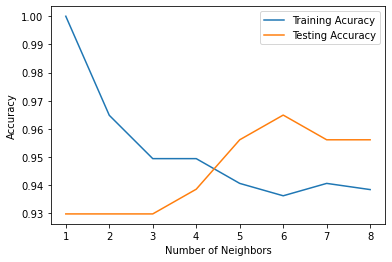

In [68]:
## 6.Plot the accuracy values for different numbers of neighbors
# Define a range of neighbors to try
neighbors_range = range(1, 9)
train_scores = []
test_scores = []


for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(neighbors_range, train_scores, label="Training Acuracy")
plt.plot(neighbors_range, test_scores, label="Testing Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
# 7. Select the best number of neighbors based on the plot
best_number_of_neighbors = 6
#According to the graph  6 number of neighbors is optimal

In [70]:
# 8. Fit a nearest neighbor model with that value and print the score.
knn_model = KNeighborsClassifier(n_neighbors=best_number_of_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data with best number of neighbors:", accuracy)

Accuracy on test data with best number of neighbors: 0.9649122807017544


In [71]:
# 9. Calculate the root mean squared value of your model.
mserror = mean_squared_error(y_test, y_pred)
rmserror = mserror ** 0.5
print("Root Mean Square Error:", rmserror)

Root Mean Square Error: 0.1873171623163388


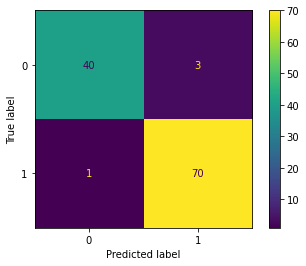

In [72]:
#10. Plot a confusion matrix and interpret the result

confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix_display=ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()